# Data preparation

##**Dataset Import from kaggle**

I have uploaded the necessary file to Kaggle as a private dataset, which should enable us to import it more quickly into Google Colab. Let's streamline the import process.

In [ ]:
from google.colab import files

In [ ]:
# Import the "files" module from the "google.colab" package to easily upload and download files in the Google Colaboratory environment.
from google.colab import files


In [ ]:
#Here you just need to upload the API (kaggle.json) file I will be giving you.
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammadjaberhossain","key":"6869aff67a258c809fca6a89975b115e"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install Monai
!pip install matplotlib
!pip install numpy
!pip install tqdm
!pip install glob2
!pip install dicom2nifti
!pip install pytest-shutil
!pip install nibabel
!pip install medpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 26.6 MB/s eta 0:00:00
  Created wheel for medpy: filename=MedPy-0.4.0-py3-none-any.whl size=214945 sha256=348d2646fc8e782c25e5ccb2b3b3a41298905e37ef1240b3ed7c6ad28cd6cc87
  Stored in directory: /root/.cache/pip/wheels/d4/32/c7/6380ab2edb8cca018d39a0f1d43250fd9791922c963117de46
Successfully built medpy


##**File handling together**

In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
# Import the "os" module
import os
# Set the environment variable "KAGGLE_CONFIG_DIR" to the "/content" directory.
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
!kaggle datasets download -d mohammadjaberhossain/finalmicedata

100% 1.72G/1.72G [01:36<00:00, 21.8MB/s]
100% 1.72G/1.72G [01:36<00:00, 19.2MB/s]


In [ ]:
#Unzipp the imported zip file
!7z x finalmicedata.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1844136352 bytes (1759 MiB)

Extracting archive: finalmicedata.zip
--
Path = finalmicedata.zip
Type = zip
Physical Size = 1844136352

  0%      0% 3 - data_folder/test_image/20170222CH_Exp3_zfp_M02.nii                                                             0% 4 - data_folder/test_image/20170222CH_Exp3_zfp_M07.nii                                                             1% 6 - data_folder/test_image/20170405CH_SC_M15.nii

In [ ]:
folder_path = '/content/data_folder/train_image'
# get the list of all files in the folder
file_list = os.listdir(folder_path)
# count the number of files in the folder
num_files = len(file_list)
print("Number of files in Train Image folder:", num_files)

folder_path = '/content/data_folder/train_mask'
# get the list of all files in the folder
file_list = os.listdir(folder_path)
# count the number of files in the folder
num_files = len(file_list)
print("Number of files in train mask folder:", num_files)

folder_path = '/content/data_folder/test_image'
# get the list of all files in the folder
file_list = os.listdir(folder_path)
# count the number of files in the folder
num_files = len(file_list)
print("Number of files in test image folder:", num_files)

folder_path = test_mask_path = '/content/data_folder/test_mask'
# get the list of all files in the folder
file_list = os.listdir(folder_path)
# count the number of files in the folder
num_files = len(file_list)
print("Number of files in test Mask folder:", num_files)

folder_path = '/content/data_folder/val_image'
# get the list of all files in the folder
file_list = os.listdir(folder_path)
# count the number of files in the folder
num_files = len(file_list)
print("Number of files in val image folder:", num_files)

folder_path = '/content/data_folder/val_mask'
# get the list of all files in the folder
file_list = os.listdir(folder_path)
# count the number of files in the folder
num_files = len(file_list)
print("Number of files in val mask folder:", num_files)

Number of files in Train Image folder: 231
Number of files in train mask folder: 231
Number of files in test image folder: 66
Number of files in test Mask folder: 66
Number of files in val image folder: 34
Number of files in val mask folder: 34


In [ ]:
#!rm -r '/content/data_folder'


#TF RatlesnetV2 ,partial, 16 images , augmentation

**Install all the required dependencies.**

In [ ]:
import os
from glob import glob
import shutil
from tqdm import tqdm
import dicom2nifti
import numpy as np
import nibabel as nib

In [ ]:
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism

In [ ]:
from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
    RandRotated,
    RandAffined,
)
from monai.transforms import NormalizeIntensityd
from monai.transforms import NormalizeIntensityd
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism
import os
from glob import glob
import shutil
from tqdm import tqdm
import numpy as np
import nibabel as nib
from monai.transforms import NormalizeIntensityd
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism
from monai.utils import set_determinism
from monai.utils import first
import matplotlib.pyplot as plt
import torch
from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.losses import DiceLoss, DiceCELoss

from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
    AsDiscreted,
    EnsureChannelFirstd,
)

def prepare(in_dir, pixdim=(0.0997441, 0.0997441, 0.5), a_min=-200, a_max=200, spatial_size=[256,256,32], cache=False):
    path_train_volumes = sorted(glob(os.path.join(in_dir, "selected_images16", "*.nii")))
    path_train_segmentation = sorted(glob(os.path.join(in_dir, "selected_masks16", "*.nii")))

    path_test_volumes = sorted(glob(os.path.join(in_dir, "test_image", "*.nii")))
    path_test_segmentation = sorted(glob(os.path.join(in_dir, "test_mask", "*.nii")))

    path_val_volumes = sorted(glob(os.path.join(in_dir, "val_image", "*.nii")))
    path_val_segmentation = sorted(glob(os.path.join(in_dir, "val_mask", "*.nii")))



    print("path_train_volumes:", path_train_volumes)
    print("path_train_segmentation:", path_train_segmentation)
    print("path_test_volumes:", path_test_volumes)
    print("path_test_segmentation:", path_test_segmentation)
    print("path_val_volumes:", path_val_volumes)
    print("path_val_segmentation:", path_val_segmentation)

    train_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_train_volumes, path_train_segmentation)]
    test_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_test_volumes, path_test_segmentation)]
    val_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_val_volumes, path_val_segmentation)]


    train_transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            EnsureChannelFirstd(keys=["vol", "seg"]),
            AsDiscreted(keys=["seg"], to_onehot=2),
            #AddChanneld(keys=["vol", "seg"]),
            #NormalizeIntensityd(keys=["vol"], subtrahend=0.3, divisor=0.5),
            NormalizeIntensityd(keys=["vol"]),
            #Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
            #Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            #ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True),
            #CropForegroundd(keys=["vol", "seg"], source_key="vol"),
            #Resized(keys=["vol", "seg"], spatial_size=spatial_size),
            ToTensord(keys=["vol", "seg"]),

        ]
    )

    generat_transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            EnsureChannelFirstd(keys=["vol", "seg"]),
            AsDiscreted(keys=["seg"], to_onehot=2),
            #AddChanneld(keys=["vol", "seg"]),
            #NormalizeIntensityd(keys=["vol"], subtrahend=0.3, divisor=0.5),
            NormalizeIntensityd(keys=["vol"]),
            #Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
            #Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            #ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True),
            #CropForegroundd(keys=["vol", "seg"], source_key="vol"),
            #Resized(keys=["vol", "seg"], spatial_size=spatial_size),

            RandAffined(keys=['vol', 'seg'], prob=0.5, translate_range=10),
            #RandRotated(keys=['vol', 'seg'], prob=0.5, range_x=5.0),
            #RandGaussianNoised(keys='image', prob=0.5),
            ToTensord(keys=["vol", "seg"]),
        ]
    )

    test_transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            EnsureChannelFirstd(keys=["vol", "seg"]),
            AsDiscreted(keys=["seg"], to_onehot=2),
            #AddChanneld(keys=["vol", "seg"]),
            #NormalizeIntensityd(keys=["vol"], subtrahend=0.3, divisor=0.5),
            NormalizeIntensityd(keys=["vol"]),
            #Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
            #Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            #ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max,b_min=0.0, b_max=1.0, clip=True),
            #CropForegroundd(keys=['vol', 'seg'], source_key='vol'),
            #Resized(keys=["vol", "seg"], spatial_size=spatial_size),
            ToTensord(keys=["vol", "seg"]),


        ]
    )


    val_transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            EnsureChannelFirstd(keys=["vol", "seg"]),
            AsDiscreted(keys=["seg"], to_onehot=2),
            NormalizeIntensityd(keys=["vol"]),
            ToTensord(keys=["vol", "seg"]),
        ]
    )

    if cache:
        #train_ds = CacheDataset(data=train_files, transform=train_transforms,cache_rate=1.0)
        train_ds = CacheDataset(data=train_files, transform=generat_transforms,cache_rate=1.0)
        train_loader = DataLoader(train_ds, batch_size=1)

        test_ds = CacheDataset(data=test_files, transform=test_transforms, cache_rate=1.0)
        test_loader = DataLoader(test_ds, batch_size=1)

        val_ds = CacheDataset(data=val_files, transform=val_transforms, cache_rate=1.0)
        val_loader = DataLoader(val_ds, batch_size=1)

        return train_loader, test_loader, val_loader

    else:
        #train_ds = Dataset(data=train_files, transform=train_transforms)
        train_ds = CacheDataset(data=train_files, transform=generat_transforms,cache_rate=1.0)
        train_loader = DataLoader(train_ds, batch_size=1)

        test_ds = Dataset(data=test_files, transform=test_transforms)
        test_loader = DataLoader(test_ds, batch_size=1)

        val_ds = Dataset(data=val_files, transform=val_transforms)
        val_loader = DataLoader(val_ds, batch_size=1)

        return train_loader, test_loader, val_loader

In [ ]:
# utility.py

from monai.utils import first
import matplotlib.pyplot as plt
import numpy as np
from monai.losses import DiceLoss
from tqdm import tqdm

In [ ]:
import torch
import os
import numpy as np
from medpy.metric import dc
import nibabel as nib
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from medpy.metric.binary import hd95
from medpy.metric.binary import hd


def train(model, data_in, loss, optim, max_epochs, device):
    test_interval = 1
    best_metric = -1
    best_metric_epoch = -1
    save_loss_train = []
    save_loss_test = []
    save_metric_train = []
    save_metric_test = []
    hd95_train_epoch = []
    hd95_test_epoch = []
    voxel_spacing = (0.0997441, 0.0997441, 0.5)
    early_stop_counter = 0  # Counter for early stopping
    early_stop_flag = False  # Flag to indicate early stopping



    train_loader, test_loader, val_loader = data_in

    for epoch in range(max_epochs):
        model.train()
        print("-" * 10)
        print(f"epoch {epoch + 1}/{max_epochs}")
        hd95_list_train = []
        count =1
        countt= 1

        for batch_data in train_loader:

            volume = batch_data["vol"]
            label = batch_data["seg"]
            device = torch.device('cuda')
            volume, label = (volume.to(device), label.to(device))

            outputs = model(volume)
            outputs = torch.softmax(outputs, axis=1)
            train_loss = loss(outputs, label)

            #from IPython import embed; embed(); asd
            if epoch == 1 or epoch == 30 or epoch == 60:
                data = volume[0].cpu().detach().numpy()
                nib.save(nib.Nifti1Image(data, np.eye(4)), f"im-{epoch}.nii.gz")
                data = label[0].cpu().detach().numpy().transpose(1, 2, 3, 0)
                nib.save(nib.Nifti1Image(data, np.eye(4)), f"label-{epoch}.nii.gz")
                data = outputs[0].cpu().detach().numpy().transpose(1, 2, 3, 0)
                nib.save(nib.Nifti1Image(data, np.eye(4)), f"pred-{epoch}.nii.gz")

            optim.zero_grad()
            train_loss.backward()
            optim.step()

            print(train_loss)

            # Calculate dice coefficient of the "lesion"
            #from IPython import embed; embed(); asd
            #lesion_output = torch.softmax(outputs[0], axis=0).detach().cpu().numpy()
            lesion_output = outputs[0].detach().cpu().numpy()
            lesion_output = np.argmax(lesion_output, axis=0)
            lesion_label = label[0].detach().cpu().numpy()
            lesion_label = np.argmax(lesion_label, axis=0)
            train_metric = dc(lesion_output, lesion_label)
            #epoch_metric_train += train_metric

            print(count)
            print(f'Train_dice: {train_metric:.4f}')
            count=count+1


        # For train_metric
        save_metric_train.append(train_metric)
        np.save(os.path.join(model_dir, 'metric_train.npy'), save_metric_train)
        train_loss_np = train_loss.cpu().detach().numpy()
        save_loss_train.append(train_loss_np)
        np.save(os.path.join(model_dir, 'loss_train.npy'), save_loss_train)



        ##################################lr scheduler##########
        # Define the learning rate scheduler
        scheduler = StepLR(optim, step_size=1, gamma=0.95)
        scheduler.step()

        current_lr = optim.param_groups[0]['lr']
        print(f"Current learning rate: {current_lr}")

        ########################################################

        if (epoch + 1) % test_interval == 0:

            model.eval()
            with torch.no_grad():
                test_epoch_loss = 0
                test_metric = 0
                epoch_metric_test = 0
                test_step = 0

                hd95_list_test = []

                for test_data in val_loader:

                    test_step += 1

                    test_volume = test_data["vol"]
                    test_label = test_data["seg"]
                    test_label = test_label != 0
                    test_volume, test_label = (test_volume.to(device), test_label.to(device),)

                    test_outputs = model(test_volume)

                    test_loss = loss(test_outputs, test_label)
                    test_epoch_loss += test_loss.item()
                    lesion_output = torch.softmax(test_outputs[0], axis=0).detach().cpu().numpy()
                    lesion_output = np.argmax(lesion_output, axis=0)
                    lesion_label = test_label[0].detach().cpu().numpy()
                    lesion_label = np.argmax(lesion_label, axis=0)
                    test_metric = dc(lesion_output, lesion_label)
                    epoch_metric_test += test_metric


                test_epoch_loss /= test_step

                print(f'val_loss_epoch: {test_epoch_loss:.4f}')
                save_loss_test.append(test_epoch_loss)
                np.save(os.path.join(model_dir, 'loss_test.npy'), save_loss_test)

                epoch_metric_test /= test_step
                print(f'val_dice_epoch: {epoch_metric_test:.4f}')
                save_metric_test.append(epoch_metric_test)
                np.save(os.path.join(model_dir, 'metric_test.npy'), save_metric_test)

                if epoch_metric_test > best_metric:
                    best_metric = epoch_metric_test
                    best_metric_epoch = epoch + 1
                    torch.save(model.state_dict(), os.path.join(model_dir, "best_metric_model.pth"))
                    early_stop_counter = 0  # Reset the early stopping counter
                else:
                    early_stop_counter += 1  # Increment the early stopping counter

                if early_stop_counter >= 40:
                    print('Validation dice loss did not improve in 40 consecutive epochs. Early stopping activated.')
                    early_stop_flag = True
                    break

            if early_stop_flag:
                break

        if early_stop_flag:
            break

In [ ]:
import torch
print("Cuda_available? ", torch.cuda.is_available())
print("Name: ", torch.cuda.get_device_name(0))
print("Device count: ", torch.cuda.device_count())
print("current device: ", torch.cuda.current_device())
print("Select device: ", torch.cuda.device(0))
print("get device name: ",torch.cuda.get_device_name(0))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #finally got the solution

Cuda_available?  True
Name:  Tesla T4
Device count:  1
current device:  0
Select device:  <torch.cuda.device object at 0x7aeddd55a0b0>
get device name:  Tesla T4


In [ ]:
import os
import shutil
import numpy as np

#from prepare import *
#from train import *

from monai.transforms import NormalizeIntensityd
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism
from monai.utils import set_determinism

from monai.utils import first
import matplotlib.pyplot as plt
import torch

from monai.networks.nets import UNet, DynUNet
from monai.networks.layers import Norm
from monai.losses import DiceLoss, DiceCELoss



from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
)

def MyDiceLoss(y_pred, y_true):
    #from IPython import embed; embed(); asd
    axis = list([i for i in range(2, len(y_true.shape))])
    num = 2 * torch.sum(y_pred * y_true, axis=axis)
    denom = torch.sum(y_pred + y_true, axis=axis)
    d = (1 - torch.mean(num / (denom + 1e-6)))
    return d

data_dir = '/content/data_folder'


if not os.path.exists('/content/ModelRatLesNet16AugPartial'):
    os.makedirs('/content/ModelRatLesNet16AugPartial')

model_dir = '/content/ModelRatLesNet16AugPartial'

In [ ]:
from torch import nn
from torch.nn import Conv3d, BatchNorm3d, ReLU, Sigmoid
import numpy as np
import torch

class ResNet(nn.Module):
    def __init__(self, in_filters):
        super(ResNet, self).__init__()

        self.seq = nn.Sequential(
                ReLU(),
                BatchNorm3d(in_filters),
                Conv3d(in_filters, in_filters, 3, padding=1),
                ReLU(),
                BatchNorm3d(in_filters),
                Conv3d(in_filters, in_filters, 3, padding=1)
            )

    def forward(self, x):
        return x + self.seq(x)

    def __str__(self):
        return "ResNet"

class Bottleneck(nn.Module):
    def __init__(self, in_filters, out_filters):
        super(Bottleneck, self).__init__()

        self.seq = nn.Sequential(
                ReLU(),
                BatchNorm3d(in_filters),
                Conv3d(in_filters, out_filters, 1)
            )

    def forward(self, x):
        return self.seq(x)

    def __str__(self):
        return "Bottleneck"

In [ ]:
import torch
from torch import nn
from torch.nn import Conv3d
from torch.nn.functional import interpolate

class RatLesNetv2(nn.Module):

    def __init__(self, modalities, filters):
        super(RatLesNetv2, self).__init__()

        self.conv1 = Conv3d(modalities, filters, 1)

        self.block1 = ResNet(filters)
        self.mp1 = nn.modules.MaxPool3d(2, ceil_mode=True)

        self.block2 = ResNet(filters)
        self.mp2 = nn.modules.MaxPool3d(2, ceil_mode=True)

        self.block3 = ResNet(filters)
        self.mp3 = nn.modules.MaxPool3d(2, ceil_mode=True)

        self.bottleneck1 = Bottleneck(filters, filters)
        self.block4 = ResNet(filters*2)

        self.bottleneck2 = Bottleneck(filters*2, filters)
        self.block5 = ResNet(filters*2)

        self.bottleneck3 = Bottleneck(filters*2, filters)
        self.block6 = ResNet(filters*2)

        self.bottleneck4 = Bottleneck(filters*2, 2)

    def forward(self, x):
        x = self.conv1(x)
        block1_out = self.block1(x)
        block1_size = block1_out.size()

        x = self.mp1(block1_out)
        block2_out = self.block2(x)
        block2_size = block2_out.size()

        x = self.mp2(block2_out)
        block3_out = self.block3(x)
        block3_size = block3_out.size()

        x = self.mp3(block3_out)
        b1 = self.bottleneck1(x) #upro here

        x = interpolate(b1, block3_size[2:], mode="trilinear")
        x = torch.cat([x, block3_out], dim=1)

        block4_out = self.block4(x)
        b2 = self.bottleneck2(block4_out)

        x = interpolate(b2, block2_size[2:], mode="trilinear")
        x = torch.cat([x, block2_out], dim=1)

        block5_out = self.block5(x)
        b3 = self.bottleneck3(block5_out)

        x = interpolate(b3, block1_size[2:], mode="trilinear")
        x = torch.cat([x, block1_out], dim=1)

        block6_out = self.block6(x)
        b4 = self.bottleneck4(block6_out)

        #softed = torch.functional.F.softmax(b4, dim=1)
        # Must be a tuple
        return b4

In [ ]:
filters = 32
modalities = 1

In [ ]:
device = torch.device('cuda')
model = RatLesNetv2(modalities, filters).to(device)

In [ ]:
device = torch.device('cuda')
model.load_state_dict(torch.load('/content/RatLesNetv2-alldata.model'))  # load the pre-trained weights


<All keys matched successfully>

In [ ]:

# Freeze the encoder layers
for param in model.conv1.parameters():
    param.requires_grad = False
for param in model.block1.parameters():
    param.requires_grad = False
for param in model.mp1.parameters():
    param.requires_grad = False
for param in model.block2.parameters():
    param.requires_grad = False
for param in model.mp2.parameters():
    param.requires_grad = False
for param in model.block3.parameters():
    param.requires_grad = False
for param in model.mp3.parameters():
    param.requires_grad = False
for param in model.bottleneck1.parameters():
    param.requires_grad = False

# Enable gradient computation for the decoder layers
for param in model.block4.parameters():
    param.requires_grad = True
for param in model.bottleneck2.parameters():
    param.requires_grad = True
for param in model.block5.parameters():
    param.requires_grad = True
for param in model.bottleneck3.parameters():
    param.requires_grad = True
for param in model.block6.parameters():
    param.requires_grad = True
for param in model.bottleneck4.parameters():
    param.requires_grad = True


In [ ]:
model.to(device)

RatLesNetv2(
  (conv1): Conv3d(1, 32, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  (block1): ResNet(
    (seq): Sequential(
      (0): ReLU()
      (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (3): ReLU()
      (4): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
  )
  (mp1): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (block2): ResNet(
    (seq): Sequential(
      (0): ReLU()
      (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (3): ReLU()
      (4): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Conv3d(32, 32, kernel_size=(3, 3, 3),

In [ ]:
data_in = prepare(data_dir, cache=True)

path_train_volumes: ['/content/data_folder/selected_images16/20170222CH_Exp3_zfp_M04.nii', '/content/data_folder/selected_images16/20170222CH_Exp3_zfp_M08.nii', '/content/data_folder/selected_images16/20170222CH_Exp3_zfp_M09.nii', '/content/data_folder/selected_images16/20170405CH_SC_M16.nii', '/content/data_folder/selected_images16/20170627CH_Exp6_ZFPtm1a_M06.nii', '/content/data_folder/selected_images16/20170628CH_Exp6_ZFPtm1a_M19.nii', '/content/data_folder/selected_images16/20170712CH_Exp7_ZFPtm1a_M01.nii', '/content/data_folder/selected_images16/20170712CH_Exp7_ZFPtm1a_M10.nii', '/content/data_folder/selected_images16/20170714CH_Exp7_ZFPtm1a_M25.nii', '/content/data_folder/selected_images16/20170714CH_Exp7_ZFPtm1a_M26.nii', '/content/data_folder/selected_images16/20170920CH_Exp09_M03.nii', '/content/data_folder/selected_images16/20170921CH_Exp09_M21.nii', '/content/data_folder/selected_images16/20190205CH_Exp2_M29.nii', '/content/data_folder/selected_images16/20190220CH_Exp1_M52.n

Loading dataset: 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]


In [ ]:
num_epochs = 289
loss_function = MyDiceLoss
optimizer = torch.optim.Adam(model.parameters(), 1e-3, weight_decay=1e-5)

if __name__ == '__main__':
    for epoch in range(1):
        print(f"Starting epoch {epoch + 1}/{num_epochs}")
        train(model, data_in, loss_function, optimizer, num_epochs, device)
        print(f"Finished epoch {epoch + 1}/{num_epochs}")

Starting epoch 1/289
----------
epoch 1/289
metatensor(0.3708, device='cuda:0', grad_fn=<AliasBackward0>)
1
Train_dice: 0.2815
metatensor(0.1237, device='cuda:0', grad_fn=<AliasBackward0>)
2
Train_dice: 0.7693
metatensor(0.2997, device='cuda:0', grad_fn=<AliasBackward0>)
3
Train_dice: 0.4225
metatensor(0.4961, device='cuda:0', grad_fn=<AliasBackward0>)
4
Train_dice: 0.0000
metatensor(0.3424, device='cuda:0', grad_fn=<AliasBackward0>)
5
Train_dice: 0.3088
metatensor(0.0894, device='cuda:0', grad_fn=<AliasBackward0>)
6
Train_dice: 0.8309
metatensor(0.1467, device='cuda:0', grad_fn=<AliasBackward0>)
7
Train_dice: 0.7134
metatensor(0.0810, device='cuda:0', grad_fn=<AliasBackward0>)
8
Train_dice: 0.8489
metatensor(0.0953, device='cuda:0', grad_fn=<AliasBackward0>)
9
Train_dice: 0.8162
metatensor(0.2040, device='cuda:0', grad_fn=<AliasBackward0>)
10
Train_dice: 0.6085
metatensor(0.4395, device='cuda:0', grad_fn=<AliasBackward0>)
11
Train_dice: 0.1307
metatensor(0.1110, device='cuda:0', grad_

##Eval

In [ ]:
import torch
import os
import numpy as np
from medpy.metric import dc
import nibabel as nib
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from medpy.metric.binary import hd95
from medpy.metric.binary import hd

def MyDiceLoss(y_pred, y_true):
    #from IPython import embed; embed(); asd
    axis = list([i for i in range(2, len(y_true.shape))])
    num = 2 * torch.sum(y_pred * y_true, axis=axis)
    denom = torch.sum(y_pred + y_true, axis=axis)
    d = (1 - torch.mean(num / (denom + 1e-6)))
    return d



loss = MyDiceLoss



train_loader, test_loader, val_loader = data_in
save_loss_test1 = []
save_metric_test1 = []
hd95_test1_epoch = []
voxel_spacing = (0.0997441, 0.0997441, 0.5)
count =1
countt= 1
model.load_state_dict(torch.load('/content/ModelRatLesNet16AugPartial/best_metric_model.pth'))
#model.load_state_dict(torch.load('/content/drive/MyDrive/Thesis/30032023/UnetMonai_withNoMask_300epochs/best_metric_model.pth'))

model = model.to(device)
model.eval()
with torch.no_grad():
  test1_epoch_loss = 0
  test1_metric = 0
  epoch_metric_test1 = 0
  test1_step = 0

  hd95_list_test1 = []

  for test1_data in test_loader:

      test1_step += 1

      test1_volume = test1_data["vol"]
      test1_label = test1_data["seg"]
      test1_label = test1_label != 0
      test1_volume, test1_label = (test1_volume.to(device), test1_label.to(device),)

      test1_outputs = model(test1_volume)

      test1_loss = loss(test1_outputs, test1_label)
      test1_epoch_loss += test1_loss.item()
      lesion_output = torch.softmax(test1_outputs[0], axis=0).detach().cpu().numpy()
      lesion_output = np.argmax(lesion_output, axis=0)
      lesion_label = test1_label[0].detach().cpu().numpy()
      lesion_label = np.argmax(lesion_label, axis=0)
      test1_metric = dc(lesion_output, lesion_label)
      epoch_metric_test1 += test1_metric

      if np.count_nonzero(lesion_output) != 0 and np.count_nonzero(lesion_label) != 0:
          hd95_test1 = hd95(lesion_output, lesion_label, voxelspacing=voxel_spacing, connectivity=1)


          print(f'Test HD95: {hd95_test1}')
          hd95_list_test1.append(hd95_test1)
          print(countt)
          countt = countt + 1
      else:
          print(countt)
          countt = countt + 1

# Compute the average HD95 for this test epoch
test1_hd95_avg = np.mean(hd95_list_test1)
hd95_test1_epoch.append(test1_hd95_avg)
print(f'Test HD95 average: {test1_hd95_avg}')


test1_epoch_loss /= test1_step

print(f'Final test_loss_epoch: {test1_epoch_loss:.4f}')
epoch_metric_test1 /= test1_step
print(f'Final test_dice_epoch: {epoch_metric_test1:.4f}')

Test HD95: 0.4254674568549905
1
Test HD95: 0.5098518269897736
2
Test HD95: 0.2992323
3
Test HD95: 0.5
4
Test HD95: 0.4994881999999999
5
Test HD95: 1.2221336611030928
6
Test HD95: 0.5098518269897736
7
Test HD95: 1.3585489561325532
8
Test HD95: 0.5
9
Test HD95: 1.615595289491905
10
Test HD95: 1.7048691571835488
11
Test HD95: 1.802048845995339
12
Test HD95: 0.2230345879545368
13
Test HD95: 0.1994882
14
Test HD95: 0.1994882
15
Test HD95: 0.5525137928983934
16
Test HD95: 0.5085971122657501
17
Test HD95: 0.3596324669750077
18
Test HD95: 0.31541853916360085
19
Test HD95: 0.2230345879545368
20
Test HD95: 0.28211891797339644
21
Test HD95: 0.8111130037653261
22
Test HD95: 0.28211891797339644
23
Test HD95: 0.822510919664341
24
Test HD95: 0.5984646
25
Test HD95: 0.5098518269897736
26
Test HD95: 0.5
27
Test HD95: 0.5
28
Test HD95: 1.0049621313685457
29
Test HD95: 0.5
30
Test HD95: 1.027021660675119
31
Test HD95: 0.5
32
Test HD95: 0.3989764
33
Test HD95: 0.4112554598321705
34
Test HD95: 0.5
35
Test 

# Unet without augmentation

**Install all the required dependencies.**

In [ ]:
import os
from glob import glob
import shutil
from tqdm import tqdm
import dicom2nifti
import numpy as np
import nibabel as nib

In [ ]:
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism

In [ ]:
from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
)
from monai.transforms import NormalizeIntensityd

from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism
import os
from glob import glob
import shutil
from tqdm import tqdm
import numpy as np
import nibabel as nib
from monai.transforms import NormalizeIntensityd
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism
from monai.utils import set_determinism
from monai.utils import first
import matplotlib.pyplot as plt
import torch
from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.losses import DiceLoss, DiceCELoss

from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
    AsDiscreted,
    EnsureChannelFirstd,
)

def prepare(in_dir, pixdim=(0.0997441, 0.0997441, 0.5), a_min=-200, a_max=200, spatial_size=[256,256,32], cache=False):
    path_train_volumes = sorted(glob(os.path.join(in_dir, "train_image", "*.nii")))
    path_train_segmentation = sorted(glob(os.path.join(in_dir, "train_mask", "*.nii")))

    path_test_volumes = sorted(glob(os.path.join(in_dir, "test_image", "*.nii")))
    path_test_segmentation = sorted(glob(os.path.join(in_dir, "test_mask", "*.nii")))

    path_val_volumes = sorted(glob(os.path.join(in_dir, "val_image", "*.nii")))
    path_val_segmentation = sorted(glob(os.path.join(in_dir, "val_mask", "*.nii")))



    print("path_train_volumes:", path_train_volumes)
    print("path_train_segmentation:", path_train_segmentation)
    print("path_test_volumes:", path_test_volumes)
    print("path_test_segmentation:", path_test_segmentation)
    print("path_val_volumes:", path_val_volumes)
    print("path_val_segmentation:", path_val_segmentation)

    train_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_train_volumes, path_train_segmentation)]
    test_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_test_volumes, path_test_segmentation)]
    val_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_val_volumes, path_val_segmentation)]


    train_transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            EnsureChannelFirstd(keys=["vol", "seg"]),
            AsDiscreted(keys=["seg"], to_onehot=2),
            #AddChanneld(keys=["vol", "seg"]),
            #NormalizeIntensityd(keys=["vol"], subtrahend=0.3, divisor=0.5),
            NormalizeIntensityd(keys=["vol"]),
            #Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
            #Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            #ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True),
            #CropForegroundd(keys=["vol", "seg"], source_key="vol"),
            #Resized(keys=["vol", "seg"], spatial_size=spatial_size),
            ToTensord(keys=["vol", "seg"]),

        ]
    )

    test_transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            EnsureChannelFirstd(keys=["vol", "seg"]),
            AsDiscreted(keys=["seg"], to_onehot=2),
            #AddChanneld(keys=["vol", "seg"]),
            #NormalizeIntensityd(keys=["vol"], subtrahend=0.3, divisor=0.5),
            NormalizeIntensityd(keys=["vol"]),
            #Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
            #Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            #ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max,b_min=0.0, b_max=1.0, clip=True),
            #CropForegroundd(keys=['vol', 'seg'], source_key='vol'),
            #Resized(keys=["vol", "seg"], spatial_size=spatial_size),
            ToTensord(keys=["vol", "seg"]),


        ]
    )


    val_transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            EnsureChannelFirstd(keys=["vol", "seg"]),
            AsDiscreted(keys=["seg"], to_onehot=2),
            NormalizeIntensityd(keys=["vol"]),
            ToTensord(keys=["vol", "seg"]),
        ]
    )

    if cache:
        train_ds = CacheDataset(data=train_files, transform=train_transforms,cache_rate=1.0)
        train_loader = DataLoader(train_ds, batch_size=1)

        test_ds = CacheDataset(data=test_files, transform=test_transforms, cache_rate=1.0)
        test_loader = DataLoader(test_ds, batch_size=1)

        val_ds = CacheDataset(data=val_files, transform=val_transforms, cache_rate=1.0)
        val_loader = DataLoader(val_ds, batch_size=1)

        return train_loader, test_loader, val_loader

    else:
        train_ds = Dataset(data=train_files, transform=train_transforms)
        train_loader = DataLoader(train_ds, batch_size=1)

        test_ds = Dataset(data=test_files, transform=test_transforms)
        test_loader = DataLoader(test_ds, batch_size=1)

        val_ds = Dataset(data=val_files, transform=val_transforms)
        val_loader = DataLoader(val_ds, batch_size=1)

        return train_loader, test_loader, val_loader

In [ ]:
# utility.py

from monai.utils import first
import matplotlib.pyplot as plt
import numpy as np
from monai.losses import DiceLoss
from tqdm import tqdm

In [ ]:
import torch
import os
import numpy as np
from medpy.metric import dc
import nibabel as nib
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from medpy.metric.binary import hd95
from medpy.metric.binary import hd


def train(model, data_in, loss, optim, max_epochs, device):
    test_interval = 1
    best_metric = -1
    best_metric_epoch = -1
    save_loss_train = []
    save_loss_test = []
    save_metric_train = []
    save_metric_test = []
    hd95_train_epoch = []
    hd95_test_epoch = []
    voxel_spacing = (0.0997441, 0.0997441, 0.5)
    early_stop_counter = 0  # Counter for early stopping
    early_stop_flag = False  # Flag to indicate early stopping
    train_loader, test_loader, val_loader = data_in

    for epoch in range(max_epochs):
        model.train()
        print("-" * 10)
        print(f"epoch {epoch + 1}/{max_epochs}")
        hd95_list_train = []
        count =1
        countt= 1

        for batch_data in train_loader:

            volume = batch_data["vol"]
            label = batch_data["seg"]
            device = torch.device('cuda')
            volume, label = (volume.to(device), label.to(device))

            outputs = model(volume)
            outputs = torch.softmax(outputs, axis=1)
            train_loss = loss(outputs, label)
            if epoch == 1 or epoch == 30 or epoch == 60:
                data = volume[0].cpu().detach().numpy()
                nib.save(nib.Nifti1Image(data, np.eye(4)), f"im-{epoch}.nii.gz")
                data = label[0].cpu().detach().numpy().transpose(1, 2, 3, 0)
                nib.save(nib.Nifti1Image(data, np.eye(4)), f"label-{epoch}.nii.gz")
                data = outputs[0].cpu().detach().numpy().transpose(1, 2, 3, 0)
                nib.save(nib.Nifti1Image(data, np.eye(4)), f"pred-{epoch}.nii.gz")

            optim.zero_grad()
            train_loss.backward()
            optim.step()

            print(train_loss)
            lesion_output = outputs[0].detach().cpu().numpy()
            lesion_output = np.argmax(lesion_output, axis=0)
            lesion_label = label[0].detach().cpu().numpy()
            lesion_label = np.argmax(lesion_label, axis=0)
            train_metric = dc(lesion_output, lesion_label)
            #epoch_metric_train += train_metric

            print(count)
            print(f'Train_dice: {train_metric:.4f}')
            count=count+1


        # For train_metric
        save_metric_train.append(train_metric)
        np.save(os.path.join(model_dir, 'metric_train.npy'), save_metric_train)
        train_loss_np = train_loss.cpu().detach().numpy()
        save_loss_train.append(train_loss_np)
        np.save(os.path.join(model_dir, 'loss_train.npy'), save_loss_train)



        ##################################lr scheduler##########
        # Define the learning rate scheduler
        scheduler = StepLR(optim, step_size=1, gamma=0.95)
        scheduler.step()

        current_lr = optim.param_groups[0]['lr']
        print(f"Current learning rate: {current_lr}")

        ########################################################

        if (epoch + 1) % test_interval == 0:

            model.eval()
            with torch.no_grad():
                test_epoch_loss = 0
                test_metric = 0
                epoch_metric_test = 0
                test_step = 0

                hd95_list_test = []

                for test_data in val_loader:

                    test_step += 1

                    test_volume = test_data["vol"]
                    test_label = test_data["seg"]
                    test_label = test_label != 0
                    test_volume, test_label = (test_volume.to(device), test_label.to(device),)

                    test_outputs = model(test_volume)

                    test_loss = loss(test_outputs, test_label)
                    test_epoch_loss += test_loss.item()
                    lesion_output = torch.softmax(test_outputs[0], axis=0).detach().cpu().numpy()
                    lesion_output = np.argmax(lesion_output, axis=0)
                    lesion_label = test_label[0].detach().cpu().numpy()
                    lesion_label = np.argmax(lesion_label, axis=0)
                    test_metric = dc(lesion_output, lesion_label)
                    epoch_metric_test += test_metric


                test_epoch_loss /= test_step

                print(f'val_loss_epoch: {test_epoch_loss:.4f}')
                save_loss_test.append(test_epoch_loss)
                np.save(os.path.join(model_dir, 'loss_test.npy'), save_loss_test)

                epoch_metric_test /= test_step
                print(f'val_dice_epoch: {epoch_metric_test:.4f}')
                save_metric_test.append(epoch_metric_test)
                np.save(os.path.join(model_dir, 'metric_test.npy'), save_metric_test)
                if epoch_metric_test > best_metric:
                    best_metric = epoch_metric_test
                    best_metric_epoch = epoch + 1
                    torch.save(model.state_dict(), os.path.join(model_dir, "best_metric_model.pth"))
                    early_stop_counter = 0  # Reset the early stopping counter
                else:
                    early_stop_counter += 1  # Increment the early stopping counter

                if early_stop_counter >= 20:
                    print('Validation dice loss did not improve in 20 consecutive epochs. Early stopping activated.')
                    early_stop_flag = True
                    break

            if early_stop_flag:
                break

        if early_stop_flag:
            break

In [ ]:
import torch
print("Cuda_available? ", torch.cuda.is_available())
print("Name: ", torch.cuda.get_device_name(0))
print("Device count: ", torch.cuda.device_count())
print("current device: ", torch.cuda.current_device())
print("Select device: ", torch.cuda.device(0))
print("get device name: ",torch.cuda.get_device_name(0))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #finally got the solution

Cuda_available?  True
Name:  Tesla T4
Device count:  1
current device:  0
Select device:  <torch.cuda.device object at 0x7f8555bdc520>
get device name:  Tesla T4


In [ ]:
import os
import shutil
import numpy as np
from monai.transforms import NormalizeIntensityd
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism
from monai.utils import set_determinism

from monai.utils import first
import matplotlib.pyplot as plt
import torch

from monai.networks.nets import UNet, DynUNet
from monai.networks.layers import Norm
from monai.losses import DiceLoss, DiceCELoss



from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
)

def MyDiceLoss(y_pred, y_true):
    #from IPython import embed; embed(); asd
    axis = list([i for i in range(2, len(y_true.shape))])
    num = 2 * torch.sum(y_pred * y_true, axis=axis)
    denom = torch.sum(y_pred + y_true, axis=axis)
    d = (1 - torch.mean(num / (denom + 1e-6)))
    return d

data_dir = '/content/data_folder'


if not os.path.exists('/content/ModelUnetNoAugment'):
    os.makedirs('/content/ModelUnetNoAugment')

model_dir = '/content/ModelUnetNoAugment'

In [ ]:
device = torch.device('cuda')
from monai.networks.nets import UNet, DynUNet
model = UNet(
    spatial_dims=3,
    #dimensions=3,
    in_channels=1,
    out_channels=2,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
).to(device)

In [ ]:
data_in = prepare(data_dir, cache=True)

/usr/local/lib/python3.10/dist-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.io.dictionary LoadImaged.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.
  warn_deprecated(argname, msg, warning_category)


path_train_volumes: ['/content/data_folder/train_image/20170222CH_Exp3_zfp_M03.nii', '/content/data_folder/train_image/20170222CH_Exp3_zfp_M04.nii', '/content/data_folder/train_image/20170222CH_Exp3_zfp_M08.nii', '/content/data_folder/train_image/20170222CH_Exp3_zfp_M09.nii', '/content/data_folder/train_image/20170223CH_Exp3_zf_M14.nii', '/content/data_folder/train_image/20170223CH_Exp_zf_M21.nii', '/content/data_folder/train_image/20170404CH_SC_M03.nii', '/content/data_folder/train_image/20170404CH_SC_M04.nii', '/content/data_folder/train_image/20170404CH_SC_M05.nii', '/content/data_folder/train_image/20170404CH_SC_M07.nii', '/content/data_folder/train_image/20170404CH_SC_M08.nii', '/content/data_folder/train_image/20170404CH_SC_M09.nii', '/content/data_folder/train_image/20170405CH_SC_M11.nii', '/content/data_folder/train_image/20170405CH_SC_M14.nii', '/content/data_folder/train_image/20170405CH_SC_M16.nii', '/content/data_folder/train_image/20170405CH_SC_M17.nii', '/content/data_fol

Loading dataset: 100%|██████████| 34/34 [00:08<00:00,  4.13it/s]


In [ ]:
num_epochs = 100
#loss_function = DiceLoss(to_onehot_y=False, softmax=True)
loss_function = MyDiceLoss
optimizer = torch.optim.Adam(model.parameters(), 1e-3, weight_decay=1e-5)

if __name__ == '__main__':
    for epoch in range(1):
        print(f"Starting epoch {epoch + 1}/{num_epochs}")
        train(model, data_in, loss_function, optimizer, num_epochs, device)
        print(f"Finished epoch {epoch + 1}/{num_epochs}")

#Eval

In [ ]:
import torch
import os
import numpy as np
from medpy.metric import dc
import nibabel as nib
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from medpy.metric.binary import hd95
from medpy.metric.binary import hd

def MyDiceLoss(y_pred, y_true):
    #from IPython import embed; embed(); asd
    axis = list([i for i in range(2, len(y_true.shape))])
    num = 2 * torch.sum(y_pred * y_true, axis=axis)
    denom = torch.sum(y_pred + y_true, axis=axis)
    d = (1 - torch.mean(num / (denom + 1e-6)))
    return d



loss = MyDiceLoss



train_loader, test_loader, val_loader = data_in
save_loss_test1 = []
save_metric_test1 = []
hd95_test1_epoch = []
voxel_spacing = (0.0997441, 0.0997441, 0.5)
count =1
countt= 1
model.load_state_dict(torch.load('/content/ModelUnetNoAugment/best_metric_model.pth'))
#model.load_state_dict(torch.load('/content/drive/MyDrive/Thesis/30032023/UnetMonai_withNoMask_300epochs/best_metric_model.pth'))

model = model.to(device)
model.eval()
with torch.no_grad():
  test1_epoch_loss = 0
  test1_metric = 0
  epoch_metric_test1 = 0
  test1_step = 0

  hd95_list_test1 = []

  for test1_data in test_loader:

      test1_step += 1

      test1_volume = test1_data["vol"]
      test1_label = test1_data["seg"]
      test1_label = test1_label != 0
      test1_volume, test1_label = (test1_volume.to(device), test1_label.to(device),)

      test1_outputs = model(test1_volume)

      test1_loss = loss(test1_outputs, test1_label)
      test1_epoch_loss += test1_loss.item()
      lesion_output = torch.softmax(test1_outputs[0], axis=0).detach().cpu().numpy()
      lesion_output = np.argmax(lesion_output, axis=0)
      lesion_label = test1_label[0].detach().cpu().numpy()
      lesion_label = np.argmax(lesion_label, axis=0)
      test1_metric = dc(lesion_output, lesion_label)
      epoch_metric_test1 += test1_metric

      if np.count_nonzero(lesion_output) != 0 and np.count_nonzero(lesion_label) != 0:
          hd95_test1 = hd95(lesion_output, lesion_label, voxelspacing=voxel_spacing, connectivity=1)


          print(f'Test HD95: {hd95_test1}')
          hd95_list_test1.append(hd95_test1)
          print(countt)
          countt = countt + 1
      else:
          print("Skipping HD95 calculation for this batch in testing due to no predicted lesions.")
          print(countt)
          countt = countt + 1

# Compute the average HD95 for this test epoch
test1_hd95_avg = np.mean(hd95_list_test1)
hd95_test1_epoch.append(test1_hd95_avg)
print(f'Test HD95 average: {test1_hd95_avg}')


test1_epoch_loss /= test1_step

print(f'Final test_loss_epoch: {test1_epoch_loss:.4f}')
epoch_metric_test1 /= test1_step
print(f'Final test_dice_epoch: {epoch_metric_test1:.4f}')

## Plot result here



In [ ]:
#in_dir = '/content/data'
model_dir = '/content/ModelUnetNoAugment'

In [ ]:
train_loss = np.load(os.path.join(model_dir, 'loss_train.npy'))
train_metric = np.load(os.path.join(model_dir, 'metric_train.npy'))
test_loss = np.load(os.path.join(model_dir, 'loss_test.npy'))
test_metric = np.load(os.path.join(model_dir, 'metric_test.npy'))

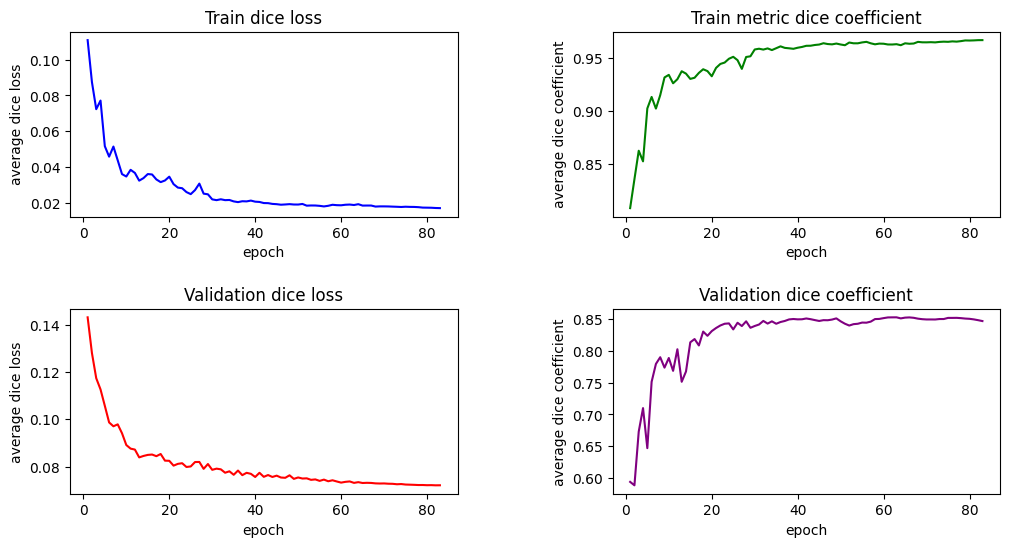

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

model_dir = '/content/ModelUnetNoAugment'

train_loss = np.load(os.path.join(model_dir, 'loss_train.npy'))
train_metric = np.load(os.path.join(model_dir, 'metric_train.npy'))
test_loss = np.load(os.path.join(model_dir, 'loss_test.npy'))
test_metric = np.load(os.path.join(model_dir, 'metric_test.npy'))

plt.figure("Monai 3D Unet", figsize=(12, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

# Plot train dice loss
plt.subplot(2, 2, 1)
plt.title("Train dice loss")
x = np.arange(len(train_loss)) + 1
plt.xlabel("epoch")
plt.ylabel("average dice loss")
plt.plot(x, train_loss, color='blue')

# Plot train metric DICE
plt.subplot(2, 2, 2)
plt.title("Train metric dice coefficient")
plt.xlabel("epoch")
plt.ylabel("average dice coefficient")
plt.plot(x, train_metric, color='green')

# Plot test dice loss
plt.subplot(2, 2, 3)
plt.title("Validation dice loss")
x = np.arange(len(test_loss)) + 1
plt.xlabel("epoch")
plt.ylabel("average dice loss")
plt.plot(x, test_loss, color='red')

# Plot test metric DICE
plt.subplot(2, 2, 4)
plt.title("Validation dice coefficient")
plt.xlabel("epoch")
plt.ylabel("average dice coefficient")
plt.plot(x, test_metric, color='purple')

plt.show()
